In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("netflix_titles.csv")

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [28]:
basics_tsv="title.basics.tsv.gz"
basics=pd.read_csv(basics_tsv, sep="\t", low_memory=False)
ratings_tsv="title.ratings.tsv.gz"
ratings=pd.read_csv(ratings_tsv, sep="\t", low_memory=False)



In [135]:
data=pd.merge(basics, ratings, on ="tconst")
data.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1687
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,208
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1425
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,122
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2224


In [ ]:
data=data.drop_duplicates()
data.drop(labels=["isAdult", "endYear", "originalTitle"], axis=1, inplace=True)
data.rename(columns={"primaryTitle":"title"},  inplace=True)

# Top 10 movies in Netflix

In [214]:
movies_rating=data[(data["titleType"]=="movie") | (data["titleType"]=="tvMovie")]
df_movies=df[df["type"]=="Movie"]


movies=pd.merge(movies_rating,df_movies, on="title", how="inner" )
movies=movies.sort_values(by="averageRating", ascending=False)
movies=movies[["title", "averageRating", "genres", "country"]]
movies.head()

,title,averageRating,genres,country
1169,The Rehearsal,9.6,Comedy,New Zealand
1987,At All Costs,9.5,Documentary,United States
3115,Game Over,9.5,Documentary,Egypt
697,Jonas,9.3,Documentary,Brazil
2695,The Outcasts,9.3,Documentary,United States


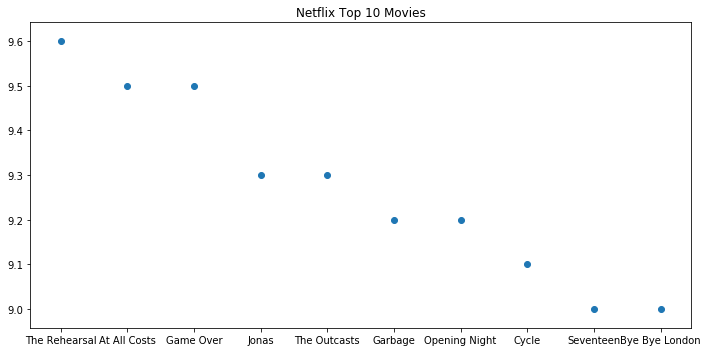

In [220]:
plt.figure(figsize=(10,5))
plt.scatter(movies.title[:10], movies.averageRating[:10])
plt.title("Netflix Top 10 Movies")
plt.tight_layout()


In [266]:
country_by_movie=movies.groupby("country").mean()
country_by_movie.sort_values(by="averageRating", ascending=False)

,averageRating
country,
"New Zealand, United States",8.800000
"United Kingdom, Ukraine, United States",8.400000
"Denmark, Indonesia, Finland, Norway, United Kingdom, Israel, France, United States, Germany, Netherlands",8.300000
"United Kingdom,",8.200000
"Sweden, United Kingdom, Finland",8.200000
...,...
"United Kingdom, Germany, United States",3.800000
"India, Mexico",3.633333
Bulgaria,3.400000


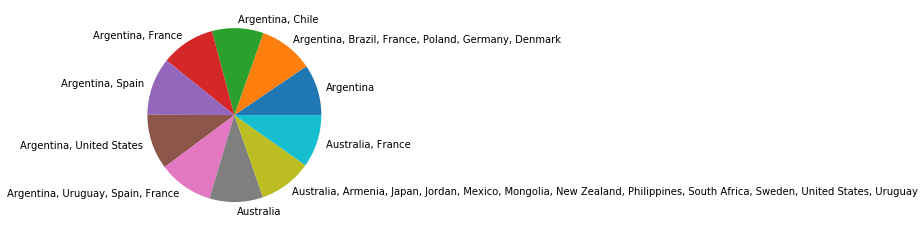

In [265]:
plt.figure()
plt.pie(x=country_by_movie["averageRating"][:10], labels=country_by_movie.index[:10]);

# Top 10 countries

In [289]:
countries_movies=pd.merge(df, data, on="title", how="inner")
countries_movies=countries_movies[["country", "averageRating"]]
countries=countries_movies.groupby(by="country").mean()
countries.reset_index(inplace=True)
countries=countries.assign(country=countries.country.str.split(",").explode("country").reset_index(drop=True))
countries=countries.groupby(by="country").mean().sort_values(by="averageRating", ascending=False)

Text(0.5, 1.0, 'Top 10 countries with highest avg score')

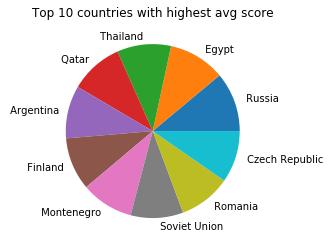

In [301]:
plt.figure(figsize=(10,4))
plt.pie(x=countries["averageRating"][:10], labels=countries.index[:10]);
plt.title("Top 10 countries with highest avg score")

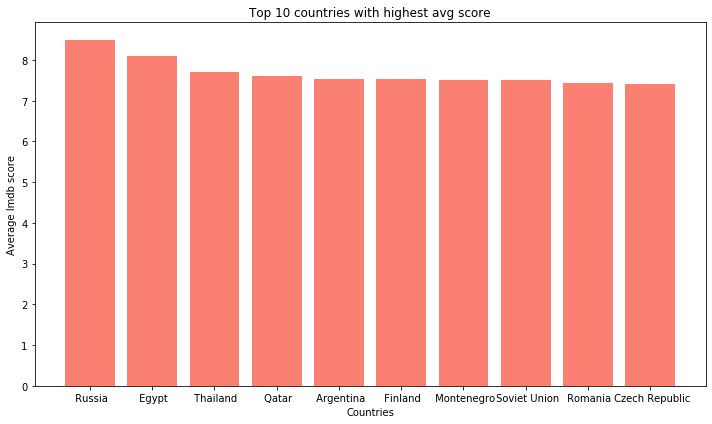

In [300]:
plt.figure(figsize=(10,6))
plt.bar(x=countries.index[:10], height=countries["averageRating"][:10], color="salmon")
plt.title("Top 10 countries with highest avg score")
plt.xlabel("Countries")
plt.ylabel("Average Imdb score")
plt.tight_layout()

In [302]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# Top 10 directors

In [304]:
directors_netflix=pd.merge(df, data, on="title", how="inner")
directors_netflix=directors_netflix[["director", "averageRating"]]
directors=directors_netflix.groupby(by="director").mean().sort_values(by="averageRating", ascending=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

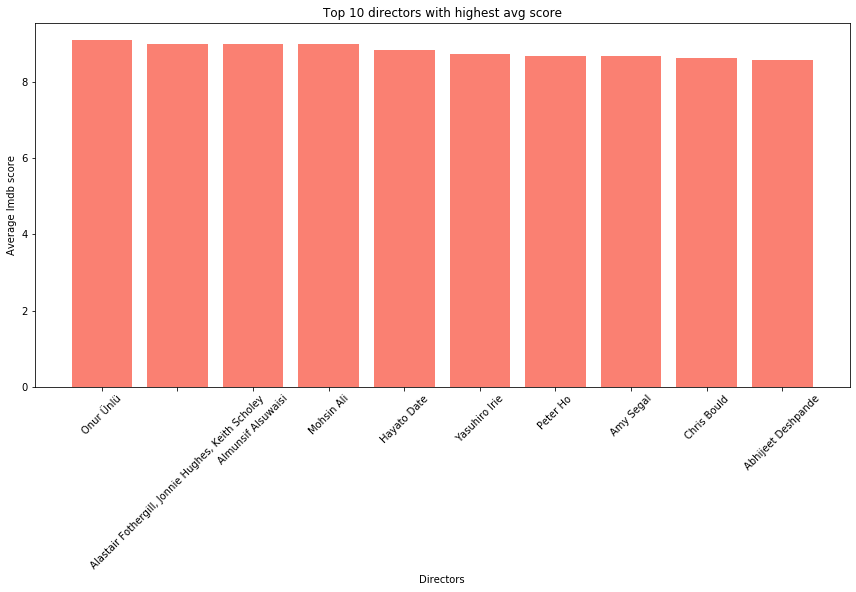

In [308]:
plt.figure(figsize=(12,6))
plt.bar(x=directors.index[:10], height=directors["averageRating"][:10], color="salmon")
plt.title("Top 10 directors with highest avg score")
plt.xlabel("Directors")
plt.ylabel("Average Imdb score")
plt.tight_layout()
plt.xticks(rotation=45)

**Directors with most movies**

In [315]:
directors_movies=pd.merge(df, data, on="title", how="inner")
directors_movies=directors_movies[["director", "title"]]
directors=directors_movies.groupby(by="director").count().sort_values(by="title", ascending=False)
directors.head()

,title
director,
Youssef Chahine,103
Mohammed Alhmly,96
Elliott Lester,74
Stefano Lodovichi,72
Steven Knight,71


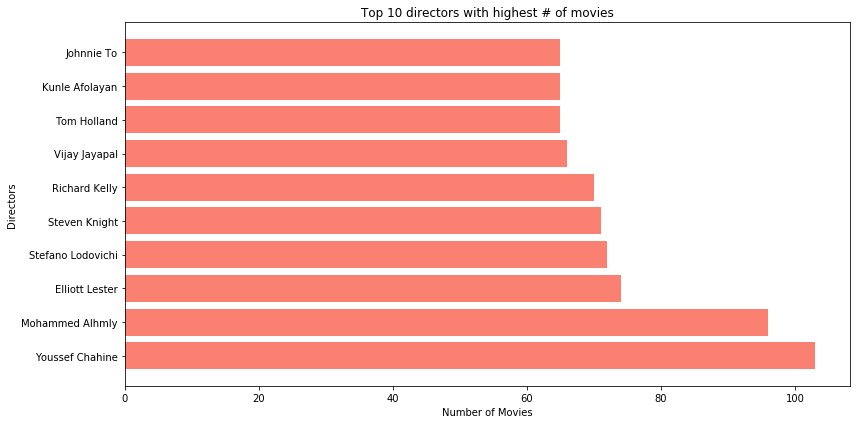

In [329]:
plt.figure(figsize=(12,6))
plt.barh(y=directors.index[:10], width=directors["title"][:10], color="salmon")
plt.title("Top 10 directors with highest # of movies")
plt.xlabel("Number of Movies")
plt.ylabel("Directors")
plt.tight_layout()


In [320]:
df["type"]

0       TV Show
1         Movie
2         Movie
3         Movie
4         Movie
         ...   
7782      Movie
7783      Movie
7784      Movie
7785    TV Show
7786      Movie
Name: type, Length: 7787, dtype: object

## Top TV shows

In [321]:
tvshows_rating=data[(data["titleType"]=="tvShort") | (data["titleType"]=="tvEpisode") | (data["titleType"]=="tvSpecial") |
                    (data["titleType"]=="tvMiniSeries")]
df_tvshows=df[df["type"]=="TV Show"]


shows=pd.merge(tvshows_rating,df_tvshows, on="title", how="inner" )
shows=shows.sort_values(by="averageRating", ascending=False)
shows=shows[["title", "averageRating", "genres", "country"]]
shows.head()

,title,averageRating,genres,country
1840,The Last Dance,10.0,"Comedy,Romance",United States
970,Moving On,10.0,"Crime,Drama",NaN
862,Revenge,10.0,"Action,History,Thriller",NaN
358,Scream,9.8,"Action,Adventure,Animation",United States
2957,Dandy,9.8,"Comedy,Drama,Mystery",Mexico


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

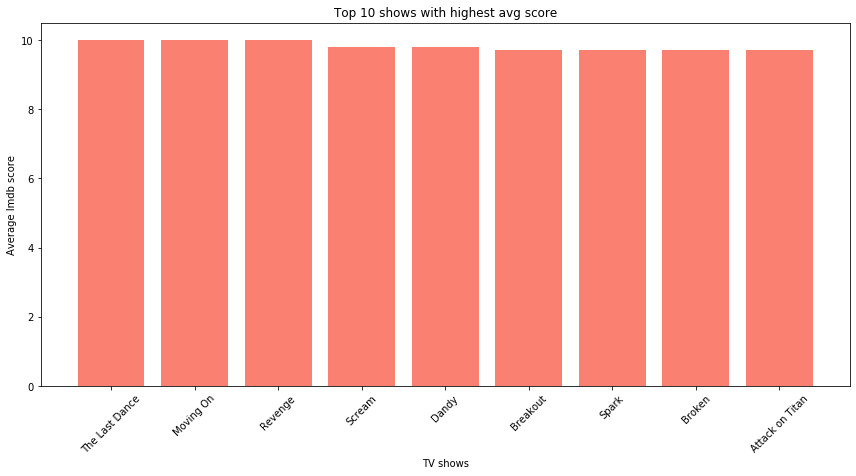

In [328]:
plt.figure(figsize=(12,6))
plt.bar(x=shows.title[:10], height=shows["averageRating"][:10], color="salmon")
plt.title("Top 10 shows with highest avg score")
plt.xlabel("TV shows")
plt.ylabel("Average Imdb score")
plt.tight_layout()
plt.xticks(rotation=45)